In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

In [271]:
"""
Group all the matches by the result and the set of all bethouses quotas
"""

def remove_duplicates(lst):
    seen = set()
    seen_add = seen.add
    return [x for x in lst if not (x in seen or seen_add(x))]

def group(lst):
    grouped_bets = []
    iteration = 0
    for index in range(len(lst)/3):
        if lst[iteration*3] != "":
            grouped_bets.append((bet_houses[index], (lst[iteration*3], lst[iteration*3 + 1], lst[iteration*3 + 2])))
        iteration += 1
    return grouped_bets

bets_csv_file = sc.textFile("/home/gg6/BetsExploring/Data/Interim/main_competitions.csv")

bet_houses = remove_duplicates(bets_csv_file.map(lambda line: line.split(","))\
        .map(lambda line : map(lambda bet_house : bet_house[:-1], line[10:37])).take(1)[0])

bets = bets_csv_file.map(lambda line: line.split(","))\
        .filter(lambda line : line[0] != "Country").map(lambda line: (line[9], group(line[10:37])))
    
print("\nBet houses -> " + str(bet_houses))
print("\nBets by house -> " + str(bets.take(5)))


Bet houses -> [u'B365', u'BS', u'BW', u'GB', u'IW', u'LB', u'SJ', u'VC', u'WH']

Bets by house -> [(u'D', [(u'B365', (u'2.75', u'3.3', u'2.5')), (u'BW', (u'2.6', u'3.3', u'2.55')), (u'IW', (u'2.6', u'3.2', u'2.5')), (u'LB', (u'2.7', u'3.4', u'2.5')), (u'VC', (u'2.75', u'3.6', u'2.45')), (u'WH', (u'2.6', u'3.3', u'2.5'))]), (u'H', [(u'B365', (u'1.7', u'3.5', u'5.25')), (u'BW', (u'1.65', u'3.8', u'4.75')), (u'IW', (u'1.7', u'3.5', u'4.4')), (u'LB', (u'1.7', u'3.8', u'4.75')), (u'VC', (u'1.73', u'3.9', u'4.6')), (u'WH', (u'1.73', u'3.6', u'4.33'))]), (u'A', [(u'B365', (u'1.67', u'3.75', u'5.0')), (u'BW', (u'1.65', u'3.6', u'5.0')), (u'IW', (u'1.75', u'3.4', u'4.3')), (u'LB', (u'1.67', u'3.8', u'4.75')), (u'VC', (u'1.7', u'4.1', u'4.6')), (u'WH', (u'1.75', u'3.75', u'4.0'))]), (u'A', [(u'B365', (u'3.6', u'3.75', u'1.91')), (u'BW', (u'3.6', u'3.6', u'1.91')), (u'IW', (u'3.7', u'3.3', u'1.9')), (u'LB', (u'3.6', u'3.75', u'1.91')), (u'VC', (u'3.7', u'3.9', u'1.91')), (u'WH', (u'3.75', u'3.75

In [285]:
"""
Added a new column composed by the bean quotas 
(mean quota for home win, mean quota for draw, mean quota for away win)
"""
def bets_mean(bets):
    total_bets = len(bets)
    
    mean_home = 0.0
    mean_draw = 0.0
    mean_away = 0.0
    
    if(total_bets > 0):
    
        for bet in bets:
            try:
                mean_home += float(bet[1][0])
                mean_draw += float(bet[1][1])
                mean_away += float(bet[1][2])
            except:
                pass
        mean_home = mean_home / total_bets
        mean_draw = mean_draw / total_bets
        mean_away = mean_away / total_bets
    
    return(mean_home, mean_draw, mean_away)
    
bets_with_mean = bets.map(lambda line : (line[0], bets_mean(line[1]), line[1]))

print("Bets with mean -> " + str(bets_with_mean.take(5)))
    

Bets with mean -> [(u'D', (2.6666666666666665, 3.35, 2.5), [(u'B365', (u'2.75', u'3.3', u'2.5')), (u'BW', (u'2.6', u'3.3', u'2.55')), (u'IW', (u'2.6', u'3.2', u'2.5')), (u'LB', (u'2.7', u'3.4', u'2.5')), (u'VC', (u'2.75', u'3.6', u'2.45')), (u'WH', (u'2.6', u'3.3', u'2.5'))]), (u'H', (1.7016666666666669, 3.6833333333333336, 4.68), [(u'B365', (u'1.7', u'3.5', u'5.25')), (u'BW', (u'1.65', u'3.8', u'4.75')), (u'IW', (u'1.7', u'3.5', u'4.4')), (u'LB', (u'1.7', u'3.8', u'4.75')), (u'VC', (u'1.73', u'3.9', u'4.6')), (u'WH', (u'1.73', u'3.6', u'4.33'))]), (u'A', (1.6983333333333333, 3.733333333333333, 4.608333333333333), [(u'B365', (u'1.67', u'3.75', u'5.0')), (u'BW', (u'1.65', u'3.6', u'5.0')), (u'IW', (u'1.75', u'3.4', u'4.3')), (u'LB', (u'1.67', u'3.8', u'4.75')), (u'VC', (u'1.7', u'4.1', u'4.6')), (u'WH', (u'1.75', u'3.75', u'4.0'))]), (u'A', (3.658333333333333, 3.6749999999999994, 1.9083333333333332), [(u'B365', (u'3.6', u'3.75', u'1.91')), (u'BW', (u'3.6', u'3.6', u'1.91')), (u'IW', (u'

In [283]:
"""
Taking into account the mean quotas, we set a curious ratio (1.25) and select, 
for each possible result of the match those quotas above this ratio
"""

curious_ratio = 1.25

def evaluate_bets_over_mean(line):
    curious_home_bets = []
    curious_draw_bets = []
    curious_away_bets = []
    
    for bet in line[2]:
        try:
            if(float(bet[1][0]) >= line[1][0] * curious_ratio):
                curious_home_bets.append(bet[0])
            if(float(bet[1][1]) >= line[1][1] * curious_ratio):
                curious_draw_bets.append(bet[0])
            if(float(bet[1][2]) >= line[1][2] * curious_ratio):
                curious_away_bets.append(bet[0])
        except:
            pass
        
    return (curious_home_bets, curious_draw_bets, curious_away_bets)

curious_bets = bets_with_mean.map(lambda line : (line[0], evaluate_bets_over_mean(line)))
print("Bets over mean -> " + str(curious_bets.take(50)))

Bets over mean -> [(u'D', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'H', ([], [], [u'VC'])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'D', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'D', (

In [284]:
"""
Taking into account the mean quotas, we set a curious ratio (1.25) and select, 
for each possible result of the match those quotas below this ratio
"""

def evaluate_bets_under_mean(line):
    curious_home_bets = []
    curious_draw_bets = []
    curious_away_bets = []
    
    for bet in line[2]:
        try:
            if(float(bet[1][0]) <= line[1][0] / curious_ratio):
                curious_home_bets.append(bet[0])
            if(float(bet[1][1]) <= line[1][1] / curious_ratio):
                curious_draw_bets.append(bet[0])
            if(float(bet[1][2]) <= line[1][2] / curious_ratio):
                curious_away_bets.append(bet[0])
        except:
            pass
        
    return (curious_home_bets, curious_draw_bets, curious_away_bets)

curious_bets = bets_with_mean.map(lambda line : (line[0], evaluate_bets_under_mean(line)))
print("Bets under mean -> " + str(curious_bets.take(50)))

Bets under mean -> [(u'D', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'H', ([], [], [u'IW'])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'A', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'D', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'A', ([], [], [])), (u'D', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'H', ([], [], [])), (u'D', 

In [274]:
"""
We select, for each match, the maximum quota for home win, draw and away win
"""

def maximum_bets(line):
    home_maximum = ("", 0.0)
    draw_maximum = ("", 0.0)
    away_maximum = ("", 0.0)
    
    for bet in line[1]:
        try:
            if(float(bet[1][0]) > home_maximum[1]):
                home_maximum = (bet[0], float(bet[1][0]))
            if(float(bet[1][1]) > draw_maximum[1]):
                draw_maximum = (bet[0], float(bet[1][1]))
            if(float(bet[1][2]) > away_maximum[1]):
                away_maximum = (bet[0], float(bet[1][2]))
        except:
            pass
    
    return (home_maximum, draw_maximum, away_maximum)

print("Maximum bets -> " + str(bets.map(lambda line: (line[0], maximum_bets(line))).take(10)))

Maximum bets -> [(u'D', ((u'B365', 2.75), (u'VC', 3.6), (u'BW', 2.55))), (u'H', ((u'VC', 1.73), (u'VC', 3.9), (u'B365', 5.25))), (u'A', ((u'IW', 1.75), (u'VC', 4.1), (u'B365', 5.0))), (u'A', ((u'WH', 3.75), (u'VC', 3.9), (u'B365', 1.91))), (u'A', ((u'B365', 3.2), (u'VC', 3.5), (u'LB', 2.25))), (u'D', ((u'IW', 1.75), (u'VC', 4.1), (u'B365', 5.0))), (u'A', ((u'B365', 3.75), (u'VC', 3.7), (u'IW', 2.1))), (u'D', ((u'BW', 2.4), (u'VC', 3.5), (u'LB', 3.1))), (u'A', ((u'B365', 5.5), (u'BW', 4.2), (u'LB', 1.62))), (u'D', ((u'LB', 2.7), (u'B365', 3.6), (u'IW', 2.5)))]


In [279]:
"""
We select, for each match, the minimum quota for home win, draw and away win
"""

def minimum_bets(line):
    home_minimum = ("", 99.0)
    draw_minimum = ("", 99.0)
    away_minimum = ("", 99.0)
    
    for bet in line[1]:
        try:
            if(float(bet[1][0]) < home_minimum[1]):
                home_minimum = (bet[0], float(bet[1][0]))
            if(float(bet[1][1]) < draw_minimum[1]):
                draw_minimum = (bet[0], float(bet[1][1]))
            if(float(bet[1][2]) < away_minimum[1]):
                away_minimum = (bet[0], float(bet[1][2]))
        except:
            pass
    
    return (home_minimum, draw_minimum, away_minimum)

print("Minimum bets -> " + str(bets.map(lambda line: (line[0], minimum_bets(line))).take(10)))

Minimum bets -> [(u'D', ((u'BW', 2.6), (u'IW', 3.2), (u'VC', 2.45))), (u'H', ((u'BW', 1.65), (u'B365', 3.5), (u'WH', 4.33))), (u'A', ((u'BW', 1.65), (u'IW', 3.4), (u'WH', 4.0))), (u'A', ((u'B365', 3.6), (u'IW', 3.3), (u'IW', 1.9))), (u'A', ((u'IW', 2.9), (u'IW', 3.3), (u'BW', 2.1))), (u'D', ((u'BW', 1.67), (u'B365', 3.6), (u'IW', 4.0))), (u'A', ((u'IW', 3.1), (u'IW', 3.3), (u'B365', 1.95))), (u'D', ((u'LB', 2.25), (u'BW', 3.3), (u'IW', 2.75))), (u'A', ((u'IW', 4.6), (u'WH', 3.8), (u'BW', 1.53))), (u'D', ((u'IW', 2.55), (u'IW', 3.3), (u'WH', 2.38)))]


In [275]:
"""
We calculate the hit ratio of each bet house. This is computed by checking if the FTR column (Final Time Result)
has the same value as the lowest quota of the bethouse for that match. The lowest qouta is considered the most 
probable result.
"""

def bets_hit(line):
    hit = []
    
    for bet in line[1]:
        try:
            if(line[0] == "H"):
                if(float(bet[1][0]) < float(bet[1][1]) and float(bet[1][0]) < float(bet[1][2])):
                   hit.append((bet[0], (1, 0)))
                else:
                   hit.append((bet[0], (0, 1)))
            if(line[0] == "D"):
                if(float(bet[1][1]) < float(bet[1][0]) and float(bet[1][1]) < float(bet[1][2])):
                   hit.append((bet[0], (1, 0)))
                else:
                   hit.append((bet[0], (0, 1)))
            if(line[0] == "A"):
                if(float(bet[1][2]) < float(bet[1][0]) and float(bet[1][2]) < float(bet[1][1])):
                   hit.append((bet[0], (1, 0)))
                else:
                   hit.append((bet[0], (0, 1)))
        except:
            pass
    return hit

hit_ratio = bets.flatMap(lambda line : bets_hit(line)).reduceByKey(lambda a, b: (a[0] + b[0], a[1] + b[1]))

print("\nHit ratio -> " + str(hit_ratio.collect()))

print("\nTotal bets -> " + str(hit_ratio.map(lambda x: (x[0], x[1][0] + x[1][1])).collect()))

hit_rate = hit_ratio.map(lambda x: (x[0], float(x[1][0]) / float(x[1][0] + x[1][1])))

print("\nHit rate -> " + str(hit_rate.collect()))


Hit ratio -> [(u'B365', (49212, 50927)), (u'LB', (47978, 50404)), (u'IW', (47657, 51417)), (u'VC', (47097, 48611)), (u'WH', (47758, 50323)), (u'SJ', (32408, 34049)), (u'BW', (47998, 49809)), (u'GB', (30514, 31792)), (u'BS', (21250, 22181))]

Total bets -> [(u'B365', 100139), (u'LB', 98382), (u'IW', 99074), (u'VC', 95708), (u'WH', 98081), (u'SJ', 66457), (u'BW', 97807), (u'GB', 62306), (u'BS', 43431)]

Hit rate -> [(u'B365', 0.4914369027052397), (u'LB', 0.48767050883291657), (u'IW', 0.48102428487797), (u'VC', 0.4920905253479333), (u'WH', 0.4869240729601044), (u'SJ', 0.48765367079464916), (u'BW', 0.4907419714335375), (u'GB', 0.48974416589092545), (u'BS', 0.4892818493702655)]


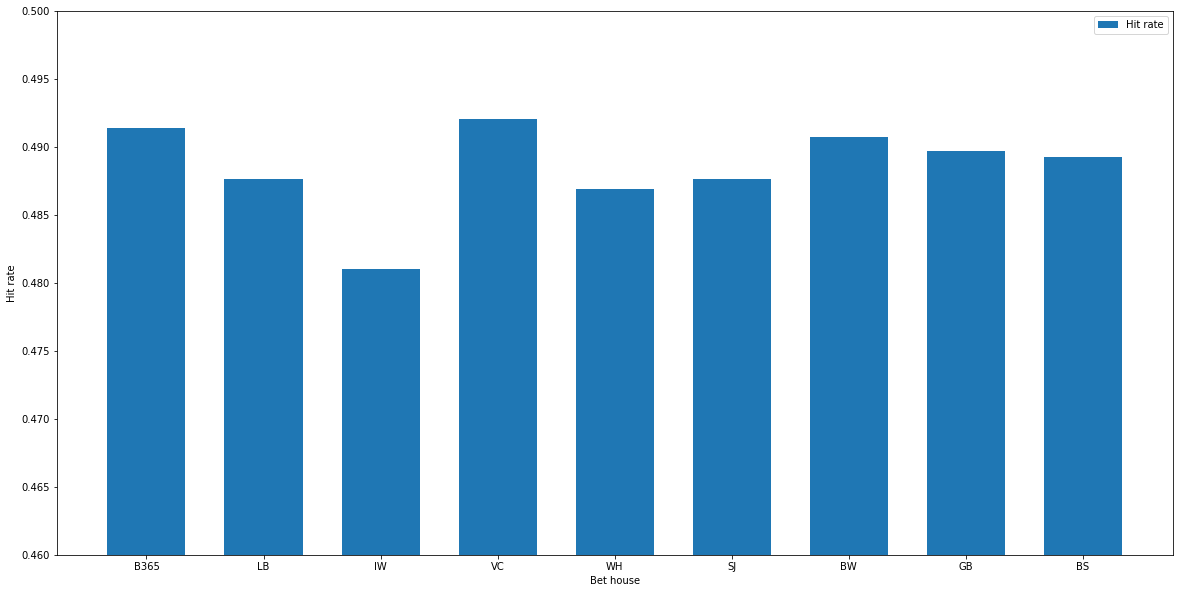

In [282]:
import matplotlib.pyplot as plt
import numpy as np

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.bar(hit_rate.keys().collect(), hit_rate.values().collect(), 1/1.5, label="Hit rate")
axes = plt.gca()
axes.set_ylim([0.46, 0.5])
plt.xlabel("Bet house")
plt.ylabel("Hit rate")
plt.legend()